In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('digits.xlsx')
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,number
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


0


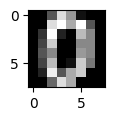

1


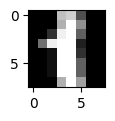

2


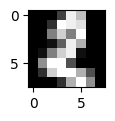

3


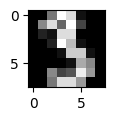

4


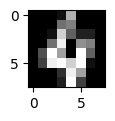

5


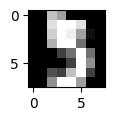

6


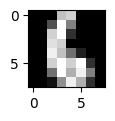

7


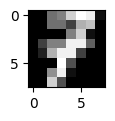

8


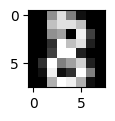

9


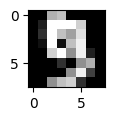

0


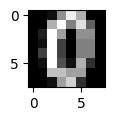

In [3]:
for i in range(0,11):
    plt.figure(figsize=(1,1))
    print(df['number'][i])
    img=np.array(df.drop('number',axis=1).iloc[i]).reshape(8,8)
    plt.imshow(img, cmap='gray')
    plt.show()

In [4]:
X=df.drop('number',axis=1)
y=df['number']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.95      0.98        43
           2       1.00      0.97      0.99        34
           3       0.91      0.97      0.94        30
           4       0.97      1.00      0.99        35
           5       0.97      0.95      0.96        38
           6       0.97      1.00      0.99        33
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        38
           9       0.93      0.95      0.94        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [5]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca=pca.fit_transform(X)
pca_df=pd.DataFrame(range(1,65),columns=['Pricipal Components'])
 
var=pca.explained_variance_ratio_
pca_df['Captured Variance']=var*100

pca_df['Cummulative Captured Variance']=np.cumsum(pca_df['Captured Variance'])

pca_df[pca_df['Cummulative Captured Variance']>95]

,Pricipal Components,Captured Variance,Cummulative Captured Variance
39,40,4.231628e-01,95.077911
40,41,4.060531e-01,95.483964
41,42,3.970848e-01,95.881049
42,43,3.564933e-01,96.237542
43,44,3.407872e-01,96.578330
44,45,3.278353e-01,96.906165
45,46,3.110320e-01,97.217197
46,47,2.885753e-01,97.505772
47,48,2.764893e-01,97.782262
48,49,2.591749e-01,98.041436


In [6]:
pca=PCA(n_components=24)
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_pca,y,test_size=0.2,random_state=1000)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.98      0.93      0.95        43
           2       0.94      0.94      0.94        33
           3       0.88      0.90      0.89        31
           4       1.00      0.97      0.99        37
           5       0.97      0.97      0.97        37
           6       0.94      1.00      0.97        32
           7       1.00      0.92      0.96        36
           8       0.97      0.95      0.96        39
           9       0.88      0.95      0.91        37

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [7]:
from sklearn.linear_model import Ridge,Lasso, ElasticNet

In [10]:
rid=Ridge()
rid.fit(X_train,y_train)
y_pred=rid.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(2.2474302412450435)